In [67]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [68]:
data = pd.read_csv('employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [70]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [71]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [72]:
#There is 2 null values each in Age,Income and Gender

# 2. Reset the index as "name".

In [73]:
data.set_index('name',inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills

In [74]:
data.loc[["Jack Morgan","Josh Wills"]]
#name_data1=data.filter(like='Jack Morgan', axis=0)


,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [75]:
data["department"].value_counts()

Operations    3
Finance       3
Sales         3
Name: department, dtype: int64

In [76]:
data[data["department"].isin(["Sales","Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5) Display employee who has more than 700 performance score

In [77]:
score_above_700 = data[data["performance_score"] > 700]
score_above_700

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6) Display employee who has more than 500 and less than 700 performance score

In [78]:
score_500_700 = data[(data["performance_score"] > 500) & (data["performance_score"] < 700)]
score_500_700

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7) Check and handle missing values in the dataset

In [79]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

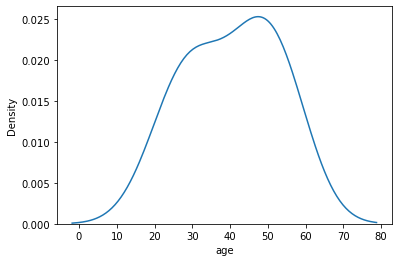

In [80]:
sns.kdeplot(data["age"])

In [81]:
#we can consider the data to be fairly symmetrical.Hence, We'll proceed to fill the missing values with Mean/Median

In [82]:
data["age"] = data["age"].fillna(data["age"].median())
data.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# Handling NaN in the Income feature

0.4963056738195404


<AxesSubplot:xlabel='income', ylabel='Density'>

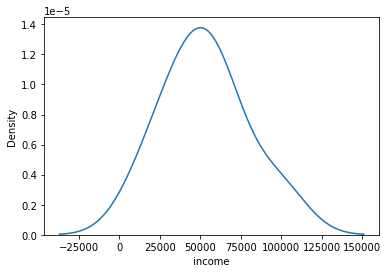

In [83]:
print(data["income"].skew())
sns.kdeplot(data["income"])

In [84]:
#Since the value of skewness 0.49 is between -0.5 and 0.5 we can consider the data to be fairly symmetrical.

#Hence, We'll proceed to fill the missing values with Mean/Median

In [85]:
data["income"] = data["income"].fillna(data["income"].mean())

# Handling NaN in the Gender feature

In [86]:
#Finally,Handling the NaN in Gender feature

#Since Gender is a categorical feature, for now we can use the Mode to fill in the missing values.

In [87]:
gender_mode = data["gender"].mode()
gender_mode

0    F
dtype: object

In [88]:
data["gender"] = data["gender"].fillna('F')

In [89]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [90]:
data.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8) Check the outliers and handle outliers in performance score using Percentiles

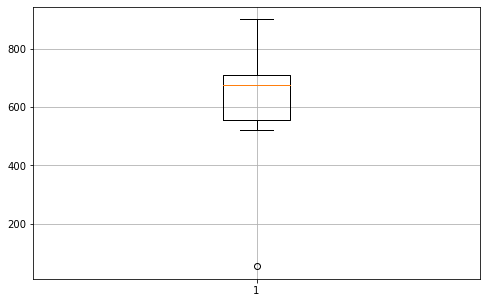

In [91]:
plt.figure(figsize=(8,5))
plt.boxplot(data["performance_score"])
plt.grid()

In [92]:
Q1 = np.percentile(data["performance_score"],25)
Q2 = np.percentile(data["performance_score"],50)
Q3 = np.percentile(data["performance_score"],75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"The first Quartile = {Q1},\nThe Second Quartile = {Q2}, \nThe Third Quartile = {Q3}, \nIQR = {IQR}, \n\nlower limit = {lower_limit},\nupper limit = {upper_limit}")

outlier = []
for x in data["performance_score"]:
    if (x < lower_limit) or (x > upper_limit):
        outlier.append(x)
print(f"\nThe outliers are = {outlier}")

index_dropped = data[(data["performance_score"] < lower_limit) | (data["performance_score"] > upper_limit)].index

#Replacing Outlier Value with Mean Value since the data set is very small
data.loc[index_dropped,'performance_score']=Q2
data

The first Quartile = 556.0,
The Second Quartile = 674.0, 
The Third Quartile = 711.0, 
IQR = 155.0, 

lower limit = 323.5,
upper limit = 943.5

The outliers are = [53]


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,674
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


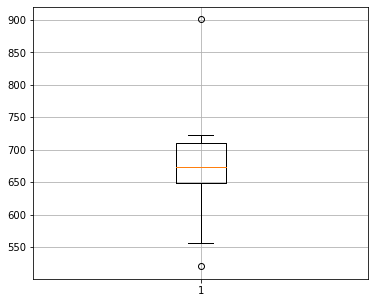

In [93]:
plt.figure(figsize=(6,5))
plt.boxplot(data["performance_score"])
plt.grid()

# 9) Check the gender column and do Dummy encoding

In [94]:
dummy_df = pd.get_dummies(data, columns=["gender"])
dummy_df

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,1,0
James Authur,54.0,52857.142857,Operations,G3,674,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


# 10) Do the standard scaling on the feature performance score.

In [95]:
from sklearn.preprocessing import StandardScaler


In [96]:
data['performance_score'].describe()

count      9.000000
mean     679.666667
std      108.685326
min      520.000000
25%      649.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [97]:
from sklearn  import preprocessing
scaler =preprocessing. StandardScaler()
StdScale = pd.DataFrame(data['performance_score'])
StdScale = scaler.fit_transform(StdScale)
StdScale = pd.DataFrame(StdScale)

In [98]:
StdScale.describe()


,0
count,9.000000e+00
mean,3.639064e-16
std,1.060660e+00
min,-1.558187e+00
25%,-2.992760e-01
50%,-5.530100e-02
75%,3.057820e-01
max,2.159992e+00


In [99]:
#We have performed standard scaling on the requested column performance_score , while keeping the other features unchanged